Aula 1
Pré-requisitos Conta ativa no GEE, como criar: https://earthengine.google.com/new_signup/

### Carregando as bibliotecas necessárias no python

O curso será todo baseado na biblioteca geemap, que contém diversas ferramentas para utilização do gee no python.
Maiores informações:
https://geemap.org/ 

In [1]:
%%capture 
# O comando capture é utilizado para que os outputs da célula não sejam exibidos, se quiser exibir, é só comentar a linha
!pip install geemap # pip é o comando de instalação no python, quando vc coloca a ! na frente do comando, vc está executando como se fosse no prompt de comando

In [2]:
# import geemap #aqui vc está importando a biblioteca
import ee

In [3]:
import geemap

In [4]:
Map = geemap.Map() #esse comando vai exigir uma autenticação


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=JzH2wHksClIzMQ6uKke_Gbg8deeH994-GKakflvsEmM&tc=US2Zf-1JwYxgGVs3izOVR5p3VX2o27ipbHAdb75gNd0&cc=xpXKdBQJRDJTKPnkh306UCy9QzyN_CbZUmRHj1k5qnU

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1ARtbsJqyPSRDcV5nwQfVJt_s8katayjufjpgaxTEM2Tma1_5VlDaO63eirM

Successfully saved authorization token.


### Área de estudo 
*Abreviações comuns: AOI ou ROI*

Seleção de AE de estudo	

Exemplos de criação de um polígono para a AE de estudo

**Opção 1**
*   Desenhar a AE no mapa
*   Verificar as propriedades do polígono
*   Mudar o nome da variável para 'AE'

In [ ]:
Map

#explorar funcionalidades interativas e desenhar AOI

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
roi = ee.FeatureCollection(Map.draw_features)

In [ ]:
roi.getInfo()

In [ ]:
# Exportar o que vc desenhou ee.FeatureCollection as an Earth Engine asset.
# task = ee.batch.Export.table.toAsset(**{
#     'collection': roi,
#     'description':'exportToTableAssetExample',
#     'assetId': 'projects/ee-atoro/assets/aula1' #aqui eu suponho que dê pra colocar tds em uma collection
# })
# task.start()

In [ ]:
# task.status() #acompanhar o status

In [52]:
roi = ee.FeatureCollection('users/pca/ROI_Campina') 

In [ ]:
# Se quiser, pode centralizar na região de acordo com as coordenadas
Map.setCenter(-45.97778207755167, -12.233998566018542, 10) #pode centralizar assim ou pela ferramenta interativa no canto superior esquerdo

In [ ]:
# a = ee.Geometry(roi.geometry())

In [ ]:
# print('Polygon area: ', a.area().divide(1000 * 1000).getInfo()) # in square kilometers


### 2. Coleção de imagem

In [53]:

AE = roi.geometry()

In [54]:
L5 = ee.ImageCollection('LANDSAT/LT05/C01/T1_SR').filterBounds(AE).filterDate('2010-11-15', '2011-03-01')
img_estudo = ee.Image(L5.median()).clip(AE)
visParams = ({'bands':['B3',  'B2',  'B1'], 'min': 150, 'max': 2000})


In [55]:
# //Adicionar as cenas de acordo com a AE de estudo 
Map.addLayer(L5.first(), visParams, 'Imagem Landsat 5')

Map.addLayer(img_estudo, visParams, 'Imagem Landsat 5 - AE de estudo')

In [56]:
Map

Map(bottom=1125420.0, center=[-13.025965926333539, -55.52514857052725], controls=(WidgetControl(options=['posi…

In [57]:

# Visualizar a lista de imagens
ListadeImagens_L5 = L5.toList(L5.size())
print('ListadeImagens_L5:', ListadeImagens_L5.getInfo())

ListadeImagens_L5: [{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7921, 6951], 'crs': 'EPSG:32622', 'crs_transform': [30, 0, 240285, 0, -30, -2292285]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7921, 6951], 'crs': 'EPSG:32622', 'crs_transform': [30, 0, 240285, 0, -30, -2292285]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7921, 6951], 'crs': 'EPSG:32622', 'crs_transform': [30, 0, 240285, 0, -30, -2292285]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7921, 6951], 'crs': 'EPSG:32622', 'crs_transform': [30, 0, 240285, 0, -30, -2292285]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7921, 6951], 'crs': 'EPSG:32622', 'crs_

In [58]:
#Para LANDSAT 8 - disponibilidade de Abril 2013 até o momento

In [59]:
 #coleção do Landsat 8
 L8 = ee.ImageCollection ('LANDSAT/LC08/C01/T1_SR').filterBounds(AE).filterDate('2016-11-15', '2017-03-01')

In [60]:
#Adicionar as cenas de acordo com a AE de estudo 
Map = geemap.Map()

img_estudo = ee.Image(L8.median()).clip(AE)
visParams = ({'bands':['B4',  'B3',  'B2'], 'min': 150, 'max': 2000})
Map.addLayer(L8.first(), visParams, 'Imagem Landsat 8')

Map.addLayer(img_estudo, visParams, 'Imagem Landsat 8 - AE de estudo')
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [61]:
# Map

In [62]:
#Recorte ae de estudo

In [63]:
# // Criando função clip para recortar a AE de estudo
# //Para L5 substituir L8 por L8 
Map = geemap.Map()

def clipper(image):
  return image.clip(AE)

L5 = L5.map(clipper)
visParams = ({'bands':['B3',  'B2',  'B1'], 'min': 150, 'max': 2000})
Map.addLayer(L5.first(), visParams, 'Imagem Landsat 5')
Map.setCenter(-45.336456, -12.252786, 10)
Map

Map(center=[-12.252786, -45.336456], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

In [64]:
# // Criando função clip para recortar a AE de estudo
# //Para L8 
Map = geemap.Map()

def clipper(image):
  return image.clip(AE)

L8 = L8.map(clipper)
visParams = ({'bands':['B4',  'B3',  'B2'], 'min': 150, 'max': 2000})
Map.addLayer(L8.first(), visParams, 'Imagem Landsat 8')
Map.setCenter(-45.336456, -12.252786, 10)
Map

Map(center=[-12.252786, -45.336456], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

### Prática no GEE - 02/09 - Remoção de nuvens 
Tabela de qualidade de pixel para remoção de nuvem LANDSAT 5
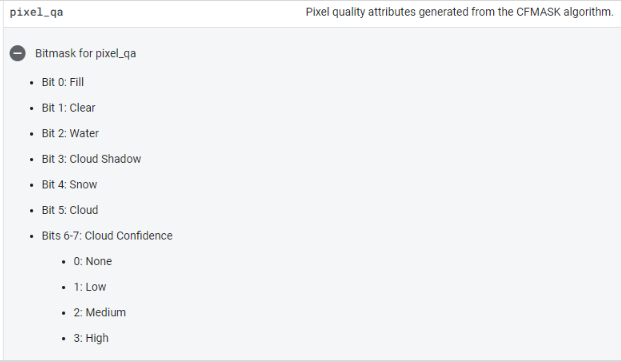

Tabela de qualidade de pixel para remoção de nuvem LANDSAT 8
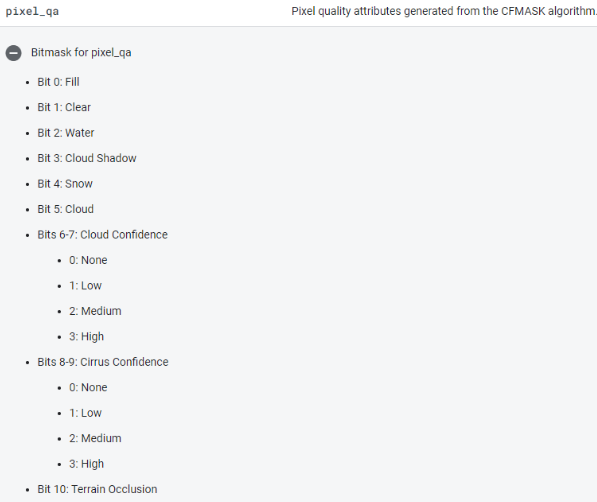



PARA **LANDSAT 5**

In [65]:
# Função para máscara de nuvem para o LANDSAT 5 - SR
Map = geemap.Map()
  # //Se o bit da nuvem (5) estiver definido e a confiança da nuvem (7) for alta 
  # //ou o bit da sombra da nuvem estiver definido (3), então é um pixel ruim.
def maskL5(image):
  qa = image.select('pixel_qa')

  cloud = qa.bitwiseAnd(1 << 5) \
          .And(qa.bitwiseAnd(1 << 7)) \
          .Or(qa.bitwiseAnd(1 << 3))
  # // Remove pixels de borda que não ocorrem em todas as bandas
  mask2 = image.mask().reduce(ee.Reducer.min())
  return image.updateMask(cloud.Not()).updateMask(mask2)
# // Aplicar a função criada  
L5masked = L5.map(maskL5)
# //Parâmetros de Visualização colorida (cor verdadeira/Red-Green-Blue) Landsat 5
visParams2 = {'bands':['B3',  'B2',  'B1'], 'min': 150, 'max': 2000}
# //Visualizar uma imagem em composição colorida com e sem máscara de nuvem 

Map.addLayer(ee.Image(L5masked.first()), visParams2, 'Landsat 5 - Máscara de nuvem')
Map.addLayer(ee.Image(L5.first()), visParams2, 'Landsat 5 - Original')  
Map.setCenter(-45.336456, -12.252786, 10)
Map

Map(center=[-12.252786, -45.336456], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

PARA LANDSAT 8

In [66]:
# Função para máscara de nuvem para o Landsat 8 - SR
Map = geemap.Map()

def maskL8(image):
  # // Bits 3 e 5 são nuvens e sombra de nuvem, respectivamente.
  cloudShadowBitMask = 1 << 3
  cloudsBitMask = 1 << 5
  # // Selecionar a banda pixel QA
  qa = image.select('pixel_qa')
# // Ambos os valores devem ser zero, indicando condições sem nuvens

  mask = qa.bitwiseAnd(cloudShadowBitMask).eq(0) \
      .And(qa.bitwiseAnd(cloudsBitMask).eq(0))
  # // Retorna a imagem com a máscara
  return image.updateMask(mask).copyProperties(image, ["system:time_start"]) \
      #  // .select("B[0-9]*")
      
# // Aplicar a função criada
L8masked = L8.map(maskL8)
# //Parametros de visualização Landsat 8
visParams = ({'bands': ['B4', 'B3', 'B2'], 'min': 150, 'max': 2000})
# //Visualizar uma imagem Landsat 8 em composição colorida com e sem máscara de nuvem
Map.addLayer(ee.Image(L8masked.first()), visParams, 'Landsat 8 - Máscara de nuvem')
Map.addLayer(ee.Image(L8.first()), visParams, 'Landsat 8 - Original')
Map.setCenter(-45.336456, -12.252786, 10)

Map


Map(center=[-12.252786, -45.336456], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

### Prática no GEE - 02/09 - Cálculo de índice de vegetação 

In [67]:
import geemap.colormaps as cm

In [68]:
cm.palettes.ndvi

('FFFFFF',
 'CE7E45',
 'DF923D',
 'F1B555',
 'FCD163',
 '99B718',
 '74A901',
 '66A000',
 '529400',
 '3E8601',
 '207401',
 '056201',
 '004C00',
 '023B01',
 '012E01',
 '011D01',
 '011301')

In [69]:
#  Landsat 5 - SR
Map = geemap.Map()

def NDVI(img):
  return img.addBands(img.normalizedDifference(['B4','B3']).rename('NDVI'))

# //Adicionar o NDVI para todo o conjunto de dados 
L5ndvi = L5masked.map(NDVI)

# //Para cada pixel seleciona o "melhor" dentro do conjunto de dados da área de estudo baseado no NDVI
composite = L5ndvi.qualityMosaic('NDVI').clip(AE)
#print(composite, 'composite')

# // Parametros de visualização NDVI
palette = cm.palettes.ndvi

# //Visualizar a imagem de NDVI da área de estudo

Map.addLayer(composite.select('NDVI'), {'min': 0, 'max':1, 'palette': palette}, 'Landsat 5 - NDVI')

#Composição colorida
Map.addLayer(composite, {'bands': ['B3',  'B2',  'B1'], 'min':150, 'max':2000}, 'Landsat 5 - cor verdadeira')

#Composição falsa cor
Map.addLayer(composite, {'bands': ['B4',  'B5',  'B3'], 'min': [1500,  1000,  100], 'max': [5000, 5000, 3500]}, 'Landsat 5 - falsa cor')

Map.setCenter(-45.336456, -12.252786, 10)
Map


Map(center=[-12.252786, -45.336456], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

In [70]:
#  Landsat 8 - SR
Map = geemap.Map()

def NDVI(img):
  return img.addBands(img.normalizedDifference(['B5','B4']).rename('NDVI'))

#Adicionar o NDVI para todo o conjunto de dados
L8ndvi = L8masked.map(NDVI)

#Para cada pixel seleciona o "melhor" dentro do conjunto de dados da área de estudo baseado no NDVI
composite = L8ndvi.qualityMosaic('NDVI').clip(AE)
# print(composite, 'composite')

# // Parametros de visualização NDVI
palette = cm.palettes.ndvi

#Visualizar a imagem de NDVI da área de estudo
Map.addLayer(composite.select('NDVI'), {'min': 0, 'max':1, 'palette': palette}, 'Landsat 8 - NDVI') 

#Composição colorida
Map.addLayer(composite, {'bands': ['B4',  'B3',  'B2'], 'min':0, 'max':2000}, 'Landsat 8 - cor verdadeira')

#Composição falsa cor
Map.addLayer(composite, {'bands': ['B5',  'B6',  'B4'], 'min': [1500,  1000,  100], 'max': [5500, 4500, 1500]}, 'Landsat 8 - falsa cor')

Map.setCenter(-45.336456, -12.252786, 10)
Map


Map(center=[-12.252786, -45.336456], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

### Aula 21/09/2022 - Coleta de amostras


In [71]:
# Perfil temporal para coletar as amostras de treinamento
# Alterar a data conforme seu período de estudo. ATENÇÃO: levar em consideração L5 e L8
Map = geemap.Map()
import geemap.colormaps as cm
collection = ee.ImageCollection('MODIS/006/MOD13A2') \
    .filterDate('2016-11-15', '2017-11-15') \
    .select('NDVI')

# Convert the image collection to an image.
image = collection.toBands()

palette = cm.palettes.ndvi

ndvi_vis = {
  'min': 0.0,
  'max': 9000.0,
  'palette': palette
}

Map.addLayer(image.clip(AE), {}, 'MODIS NDVI Time-series')
Map.addLayer(image.select(0).clip(AE), ndvi_vis, 'MODIS NDVI VIS')

#Composição falsa cor do Landsat 8. ATENÇÃO: Mudar para L5 quando for necessário
Map.addLayer(composite, {'bands': ['B5',  'B6',  'B4'], 'min': [1500,  1000,  100], 'max': [5500, 4500, 1500]}, 'Landsat 8 - falsa cor')

Map.setCenter(-45.336456, -12.252786, 10)
Map


Map(center=[-12.252786, -45.336456], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

In [72]:
if Map.user_rois is not None:
    training_samples = Map.user_rois  ###testar com ponto ver se funciona, funciona
    print(training_samples.getInfo())

In [ ]:
geemap.show_youtube("https://youtu.be/VWh5PxXPZw0")

Output(layout=Layout(width='815px'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pra ir pra pastinha do colab
geemap.ee_to_shp(Map.user_rois, "samples_L_E_M.shp")


Generating URL ...
Please wait ...
Data downloaded to /content/samples_L_E_M.shp


In [ ]:
#exportar como asset
geemap.ee_export_vector_to_asset(Map.user_rois, description='myExportTableTask', assetId='samples_L_E_M', maxVertices=None)

users/gleyce/samples_L_E_M
Exporting myExportTableTask... Please check the Task Manager from the JavaScript Code Editor.


### Aula 06/10/2022 - Máscara urbano, divisão treino/teste e RF


In [94]:
# //Gerar a máscara de área urbana

# // ---> criar o polígono ao redor da área urbana. Aqui renomear o polígono para "urbano" (criei uns polígonos de urbano fictícios), mudar as propriedades para FeatureCollection, criar uma 'property' com o nome "classe" e 'value' igual a 2 

# // Passar o polígono (FeatureCollection) para raster

Map = geemap.Map()
Map.addLayer(AE)
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [96]:
#gerando os Poligonos de urbano e renomeando
if Map.user_rois is not None:
    urbano = Map.user_rois
    print(urbano.getInfo())

{'type': 'FeatureCollection', 'columns': {'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-51.917655, -21.602256], [-51.907316, -21.604011], [-51.908904, -21.610954], [-51.919457, -21.609557], [-51.917655, -21.602256]]]}, 'id': '0', 'properties': {}}, {'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-51.9192, -21.609597], [-51.920958, -21.616899], [-51.910834, -21.618175], [-51.908861, -21.610954], [-51.9192, -21.609597]]]}, 'id': '1', 'properties': {'classe': 2, 'color': '#3388ff'}}]}


In [97]:
urbanoImg = urbano.filter(ee.Filter.notNull(['classe'])) \
  .reduceToImage(**{
    'properties': ['classe'],
    'reducer': ee.Reducer.first()
})

In [98]:
# // Adicionar a layer do raster da máscara de urbano para verificar se está ok

Map.addLayer(urbanoImg,{}, 'Urbano Img')

In [99]:
areaImg = ee.Image.constant(1).clip(AE) #//gerar uma imagem raster com pixels com valor 1 para todo o limite da área de estudo
urbanoMask = areaImg.blend(urbanoImg) #// unir os rasters do urbano e da área de estudo

In [100]:
Map = geemap.Map()
# // Adicionar a layer para verificar se está ok
Map.addLayer(urbanoMask,{min:0, max:1}, 'Mascara urbano')
# // Mascarar a imagem Landsat com a máscara criada
composite = composite.updateMask(urbanoMask.eq(1)) #// valor igual a 1 representa a área diferente da área urbana que tem valor igual a 2

Map.addLayer(composite) #debug com detalhes
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

Divisão treino e validação

In [101]:
#carregando amostras criadas anteriormente
newfc = ee.FeatureCollection('users/pca/samples_campina3')

In [102]:
# //Opção para gerar amostras de validação a partir das amostras de treinamento

# // Separar as amostras de treinamento criadas anteriormente em treino e validação (avaliação da classificação)
sample = newfc.randomColumn()
print("amostras",sample.getInfo())

amostras {'type': 'FeatureCollection', 'columns': {'classe': 'String', 'color': 'String', 'landcover': 'Integer', 'random': '<any>', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-51.89458106659504, -21.61285700704112], [-51.89178073677116, -21.6128570448381], [-51.89178073677116, -21.61108233289491], [-51.89458106659504, -21.611082324203938], [-51.89458106659504, -21.61285700704112]]]}, 'id': '00000000000000000000', 'properties': {'classe': 'nativa', 'color': '#3388ff', 'landcover': 1, 'random': 0.6722173494267805}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-51.882376518935, -21.61476997850365], [-51.87839008757064, -21.614770017704114], [-51.87839008757064, -21.613066590422733], [-51.882376518935, -21.613066639527165], [-51.882376518935, -21.61476997850365]]]}, 'id': '00000000000000000001', 'properties': {'classe': 'nativa', 'color': '#3388ff', 'landcover': 1, 'random': 0.0288706359324179}}, 

In [103]:
split = 0.7 # // Definir 70% para treinamento, 30% para validação.
prev_training = sample.filter(ee.Filter.lt('random', split));
prev_validation = sample.filter(ee.Filter.gte('random', split));
print('treino', prev_training.getInfo());
print('validação', prev_validation.getInfo())

treino {'type': 'FeatureCollection', 'columns': {'classe': 'String', 'color': 'String', 'landcover': 'Integer', 'random': '<any>', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-51.89458106659504, -21.61285700704112], [-51.89178073677116, -21.6128570448381], [-51.89178073677116, -21.61108233289491], [-51.89458106659504, -21.611082324203938], [-51.89458106659504, -21.61285700704112]]]}, 'id': '00000000000000000000', 'properties': {'classe': 'nativa', 'color': '#3388ff', 'landcover': 1, 'random': 0.6722173494267805}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-51.882376518935, -21.61476997850365], [-51.87839008757064, -21.614770017704114], [-51.87839008757064, -21.613066590422733], [-51.882376518935, -21.613066639527165], [-51.882376518935, -21.61476997850365]]]}, 'id': '00000000000000000001', 'properties': {'classe': 'nativa', 'color': '#3388ff', 'landcover': 1, 'random': 0.0288706359324179}}, {'

In [104]:
# // Seleção das bandas que serão utilizadas -------------------------------------------------------------------//

# //Para Landsat 5
# bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'NDVI'];

# //Para Landsat 8
bands = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'NDVI'];


# //Classificação -------------------------------------------------------------------------//

# // Criar a variável de treinamento para a classificação com o Random Forest.

composite = composite.select(bands)
training = composite.sampleRegions(**{
    'collection':prev_training,
    'properties':['landcover'],
    'scale':30})

In [105]:
igbpPalette = [
'#00750c', # Nativa
'#090be5', #// Agua
'#ff1706', #// Solo
]


In [106]:
Map2= geemap.Map()
Map2.addLayer(composite)
Map2.addLayer(prev_training)
Map2.addLayer(prev_validation)
Map2

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

Classificação




In [107]:
# // Filter out the null property values and try again.
trainingNoNulls = training.filter(
  ee.Filter.notNull(training.first().propertyNames())
);
# FC.filter(ee.Filter.eq("system:index", '3'))

In [108]:
# //Treinando o classificador Random Forest
classifier_RF = ee.Classifier.smileRandomForest(300).train(training, 'landcover')

In [109]:
# # // Aplicação da classificação.
classified_RF = composite.classify(classifier_RF)  

In [113]:
trainAccuracy = classifier_RF.confusionMatrix()
print('Resubstitution error matrix: ', trainAccuracy.getInfo())
print('Training overall accuracy: ', trainAccuracy.accuracy().getInfo())

In [112]:
igbpPalette = [
  'aec3d4', # nativa
  '152106', '225129', '369b47', '30eb5b', '387242', # forest
  '6a2325', 'c3aa69', 'b76031', 'd9903d', '91af40',  # pasto
  # '111149', # wetlands
  # 'cdb33b', # croplands
  # 'cc0013', # urban
  # '33280d', # crop mosaic
  # 'd7cdcc', # snow and ice
  # 'f7e084', # barren
  # '6f6f6f'  # tundra
]

# # //Visualizando a classificação Randon Forest
Map= geemap.Map()
Map.addLayer(classified_RF, {'palette': igbpPalette, 'min': 1, 'max': 3}, 'Random Forest3')
Map 

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…